# **Loan Prediction**

The aim of this project is to predict real-estate prices using the machine learning algorithms: Logistic Regression, Decision tree Classifier, Random Forest Classifier. The three of them will show different results for the accuracy.

# **Loading the data**
In the previous phase - Provisioning, data collection, data cleaning and data preparation were performed on a data scrpaed from website. In this file, this processed data will be used to train the models.

# **Modelling**
In this stage, I decided to use several models and eventually I can decide which one performed the best in order to use in the next phase - Deployment. I will explore the machine learning algorithms: Logistic Regression, Decision tree, Random Forest. All three will show different results for the accuracy. I decided to use these four models so as to check more features for comparing and different aspects. 

I will compare the models by calculating the MAE, MSE, RMSE and the accuracy.

# **Evaluation** 
After training the models, it is important for the next steps to find out how good the performance of the models is. Based on this, it will be possible to conclude whether Modelling & Evaluation is successful or not.

# **Imports**

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime
import io
import mpl_toolkits
import numpy as np
%matplotlib inline


In [2]:
# Load the data
local_file = files.upload()
train_data = io.BytesIO(local_file['results.csv'])
df = pd.read_csv(train_data)


Saving results.csv to results.csv


# **Preparing the data for training the models**

Encoding to numeric data in order to start the training of the models.

In [3]:
#drop the uniques loan id
df.drop('Loan_ID', axis = 1, inplace = True)

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    float64
 1   Married            981 non-null    float64
 2   Education          981 non-null    int64  
 3   Self_Employed      981 non-null    float64
 4   ApplicantIncome    981 non-null    int64  
 5   CoapplicantIncome  981 non-null    float64
 6   LoanAmount         981 non-null    float64
 7   Loan_Amount_Term   981 non-null    float64
 8   Credit_History     981 non-null    float64
 9   Property_Area      981 non-null    int64  
 10  Loan_Status        981 non-null    float64
 11  LoanAmount_log     981 non-null    float64
 12  TotalIncome        981 non-null    float64
 13  TotalIncome_log    981 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 107.4 KB


**Train-Test Split dataset**

Heatmaps are very useful to find relations between two variables in a dataset and this way the user gets a visualisation of the numeric data. No correlations are extremely high. Each square shows the correlation between the variables on each axis. 

*   The correlations between the feautures can be explained:


> The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. It is noticable that the correlation between the `ApplicantIncome` and `LoanAmount` is 0.57, which mean that they have a positive correlation, but not strong.



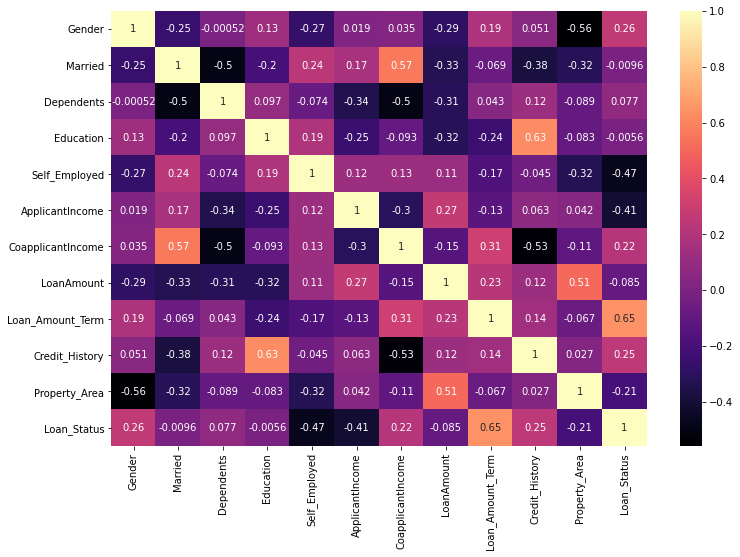

In [5]:
from pandas import DataFrame
%matplotlib inline
plt.figure(figsize=(12, 8))
df_temp = df.copy()
Index= ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']
Cols = ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']
df_temp = DataFrame(abs(np.random.randn(12, 12)), index=Index, columns=Cols)

sns.heatmap(df_temp.corr(), annot=True, cmap = 'magma')
plt.show()

Importing sklearn libraries

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Splitting into train and test set after choosing the right features X and labels y

In [7]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)

To split the dataset, I will use random sampling with 80/20 train-test split; that is, 80% of the dataset will be used for training and set aside 20% for testing:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Analyzing the numeric features.


In [9]:
numeric_features = df.select_dtypes(include=[np.number])

In [10]:
numeric_features.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log'],
      dtype='object')

In [11]:
# use only those input features with numeric data type 
df = df.select_dtypes(include=["int64","float64"]) 

In [12]:
# set the target and predictors
y = df.Loan_Status  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 

X = df_temp.drop(["Loan_Status"],axis=1)  # predictors

# **Modeling**:

Three models will be built and evaluated by their performances with R-squared metric. Additionally, insights on the features that are strong predictors of house prices, will be analised .

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**Logistic Regression:**


1.  Creating 
2.  Fitting with train data





In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
>RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

In [15]:
# model evaluation for training set
y_train_r_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_r_predict)))

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))

The model performance for training set:
RMSE is 0.43594841484763225


Do predictions on a test set. **Testing** the model by testing the test data.

In [16]:
#predict y_values using X_test set
y_reg=model.predict(X_test)


Comparing these metrics:

MAE is the easiest to understand because it’s the average error.
MSE is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE because RMSE is interpretable in the “y” units.

In [17]:
# model evaluation for testing set
print('MAE:', mean_absolute_error(y_test, y_reg)) 
print('MSE:', mean_squared_error(y_test, y_reg)) 
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_reg))) 

MAE: 0.19796954314720813
MSE: 0.19796954314720813
RMSE: 0.44493768456628635


In [18]:
logistic_score =model.score((X_test),y_test)
print("Accuracy: ", logistic_score)

Accuracy:  0.8020304568527918


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

In [19]:
evaluation = f1_score(y_test, y_reg)
evaluation

0.8869565217391304

Reporting the coefficient value for each feature. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

>The importance of a feature is measured by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction.

Feature: 0, Score: -0.02992
Feature: 1, Score: 0.52301
Feature: 2, Score: 0.35065
Feature: 3, Score: -0.06703
Feature: 4, Score: -0.00001
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00293
Feature: 7, Score: -0.00061
Feature: 8, Score: -1.58855
Feature: 9, Score: -0.46054
Feature: 10, Score: 0.00910
Feature: 11, Score: 0.00001
Feature: 12, Score: -0.06359


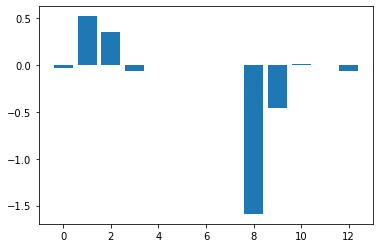

In [20]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

What coefficient of data says:

> It shows the relationship between the features. It is either positive or negative, depending ont the value shown on the graph. If it is below 0, it is a negative one, which means that whenever there is an increase in the value, there is a decrease in the price. What goes for the positive relationship - there is a parallel movement.

**Decision tree:**


1.  Creating classifier
2.  Fitting classifier with train data




In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
# model evaluation for training set
y_train_r_predict = dtree.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_r_predict)))

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))

The model performance for training set:
RMSE is 0.0


Do predictions on a test set. **Testing** the model by testing the test data.

In [23]:
y_tree=dtree.predict(X_test)

Comparing these metrics:

MAE is the easiest to understand because it’s the average error.
MSE is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE because RMSE is interpretable in the “y” units.

In [24]:
# model evaluation for testing set
print('MAE:', mean_absolute_error(y_test, y_tree)) 
print('MSE:', mean_squared_error(y_test, y_tree)) 
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_tree))) 

MAE: 0.18781725888324874
MSE: 0.18781725888324874
RMSE: 0.433378886060741




> There is a 0.21 improvement, determining this from the MAE



In [25]:
tree_score =dtree.score((X_test),y_test)
print("Accuracy: ", tree_score)

Accuracy:  0.8121827411167513


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

In [26]:
evaluation = f1_score(y_test, y_tree)
evaluation

0.8825396825396825

> Evaluate classsifier measures accuracy by using F1 score. The result shows that the model is precise.

 **Random forests**

Grid search (not finished)

In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier)])

In [48]:
params={
    'rf_n_est': [120, 140],
    'rf_max_depth': [30, 50],
    'rf_min_samples_split': [2, 3],
    'rf_min_samples_leaf': [3, 5],
    'rf_class_weight': [{0:1,1:1}, {0:1,1:5}, {0:1,1:3}, 'balanced']
}

End of grid search

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
y_forest=rf.predict(X_test)

Comparing these metrics:

MAE is the easiest to understand because it’s the average error.
MSE is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE because RMSE is interpretable in the “y” units.

In [67]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23807106598984776
Mean Squared Error: 0.12558375634517768
Root Mean Squared Error: 0.354377985130535


In [57]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.15 degrees.




> There is a 0.15 improvement.



In [58]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.62 %.


In [59]:
#Random forest determined feature importances
rf.feature_importances_

array([0.01582754, 0.02233455, 0.02017472, 0.01685751, 0.13606732,
       0.08686828, 0.12147836, 0.03646124, 0.12076792, 0.03834313,
       0.12437886, 0.12566826, 0.1347723 ])

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

Result:

In [60]:
evaluation_f= f1_score(y_test, y_forest)
evaluation_f

0.9101796407185629

> After using the F1, it is determined that the model is precised to be used in the deployment.

# **Feature importance**

In [61]:
importance = rf.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)

#list(feature_importances)
sorted_feature_importances = sorted(feature_importances, reverse = True)

#print(sorted_feature_importances)
top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['ApplicantIncome', 'TotalIncome_log', 'TotalIncome', 'LoanAmount_log', 'LoanAmount', 'Credit_History', 'CoapplicantIncome', 'Property_Area', 'Loan_Amount_Term', 'Married', 'Education', 'Self_Employed', 'Gender']


Saving the model that I am going to use in the deployment phase of the project

In [62]:
# Saving the model
import pickle

filename = 'classifier.pkl'
pickle.dump(forest, open(filename, 'wb'))

# Conclusion
I used three models to determine the accuracy - Logistic Regression, Decision Tree and Random Forest.

From the exploring of the models RMSE:

* Linear Regression score: 0.44

* Decision Tree score: 0.46

* Random forest score: 0.36

> RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. All of the models showed values in this range.

From the exploring of the models accuracy: 

* Linear Regression score:  0.73 (73%)

* Decision Tree score: 0.79 (79%)

* Random forest score: 91.91 %

From the exploring of the models after the F1 score validation:  

* Linear Regression score: 0.89

* Decision Tree score: 0.6532616143265344

* Random forest: 0.91

Random forest turns out to be the more accurate model for predicting the house price. 

All of the models showed RMSE values between 0.2 and 0.5 so that they show  relatively accurate predictions of the data. 

I evaluated the models performances with F1 score metric and the one that is overfitting the least is the Random forest.

In the end, I tried three different models and evaluated them using Mean Absolute Error. I chose MAE because it is relatively easy to interpret and outliers aren’t particularly bad in for this type of model. The one I will be using for the deplyment is the  **Random forest**.


